In [2]:
# import the libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# import and display the dataset 
df = pd.read_csv("Admission_Predict.csv")
df

,GRE_Score,TOEFL_Score,University_Rating,CGPA,Chance_of_Admission
0,337,118,4,9.65,0.92
1,324,107,4,8.87,0.76
2,316,104,3,8.00,0.72
3,322,110,3,8.67,0.80
4,314,103,2,8.21,0.65
...,...,...,...,...,...
395,324,110,3,9.04,0.82
396,325,107,3,9.11,0.84
397,330,116,4,9.45,0.91
398,312,103,3,8.78,0.67


In [3]:
# get the data set statistics 
df.describe()

,GRE_Score,TOEFL_Score,University_Rating,CGPA,Chance_of_Admission
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,8.598925,0.724350
std,11.473646,6.069514,1.143728,0.596317,0.142609
min,290.000000,92.000000,1.000000,6.800000,0.340000
25%,308.000000,103.000000,2.000000,8.170000,0.640000
50%,317.000000,107.000000,3.000000,8.610000,0.730000
75%,325.000000,112.000000,4.000000,9.062500,0.830000
max,340.000000,120.000000,5.000000,9.920000,0.970000


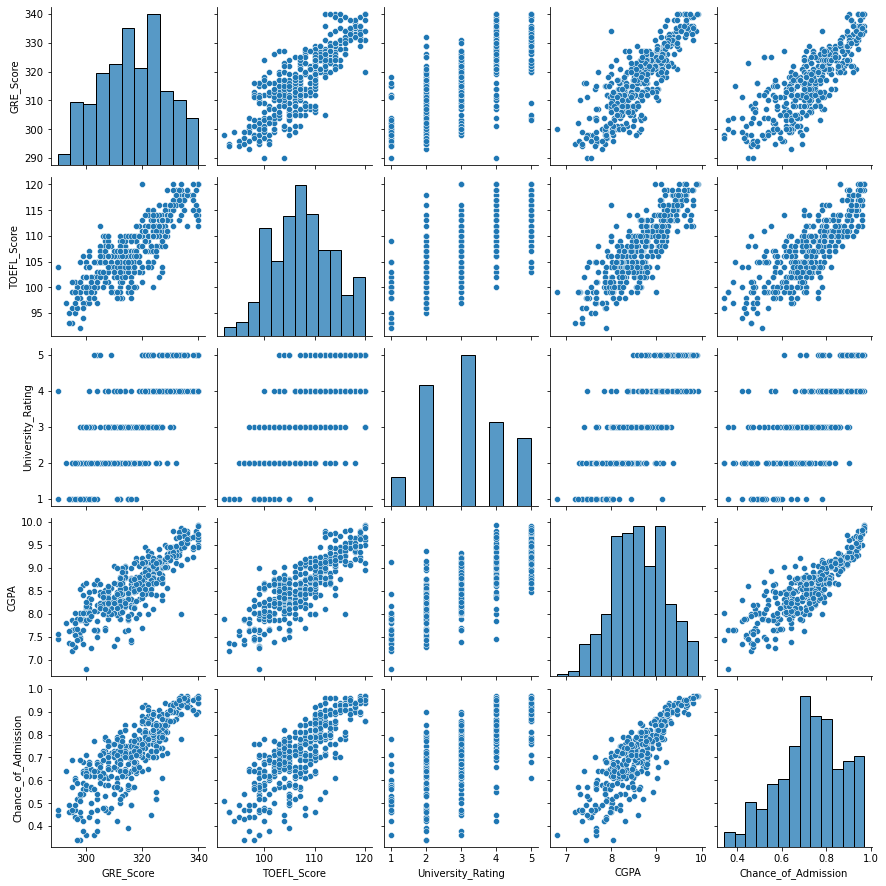

In [4]:
# define variables
x = df.drop(['Chance_of_Admission'],axis = 1)
y = df.Chance_of_Admission 

# compare all the variables
sb.pairplot(df)

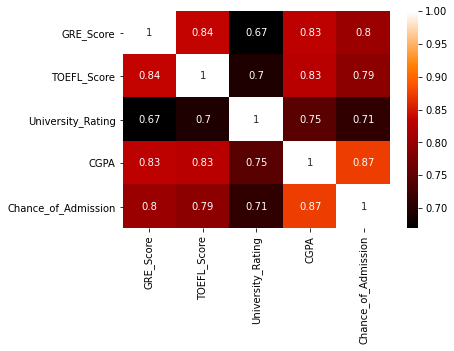

In [5]:
# check the correlation between the variables
corr = df.corr()
sb.heatmap(corr, cmap ='gist_heat', annot =True);

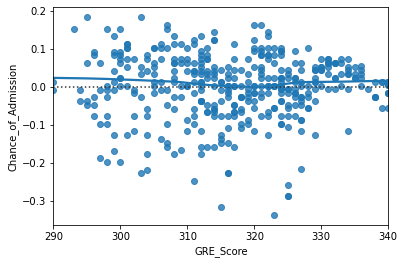

In [7]:
# compare GRE_Score and Chance_of_Admission
sb.residplot(x = df['GRE_Score'], y = df['Chance_of_Admission'], lowess = True);

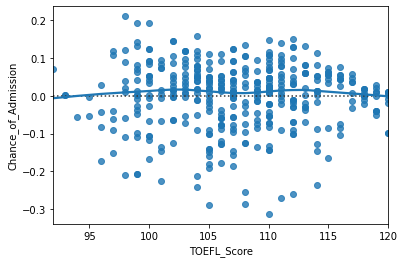

In [8]:
# compare TOEFL_Score and Chance_of_Admission
sb.residplot(x = df['TOEFL_Score'], y = df['Chance_of_Admission'], lowess = True);

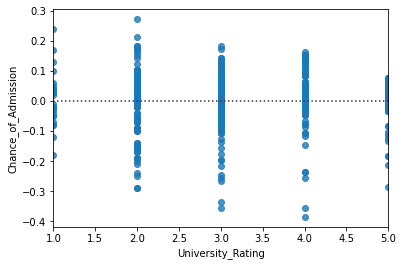

In [9]:
# compare University_Rating and Chance_of_Admission 
sb.residplot(x = df['University_Rating'], y = df['Chance_of_Admission'], lowess = True);

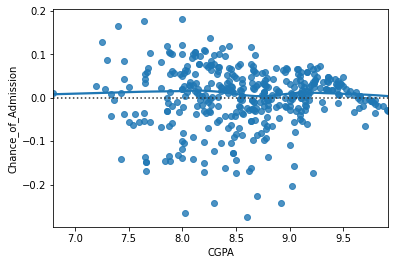

In [10]:
# compare CGPA and Chance_of_Admission
sb.residplot(x = df['CGPA'], y = df['Chance_of_Admission'], lowess = True);

In [11]:
# split the data set 50/50 with the Train Test Split function from scikit-learn
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

# create the linear regression model using the Linear Regression function from scikit-learn
regression = LinearRegression()
regression.fit(x_train, y_train)

# test the linear regression model using the actual data chosen randomly (1st row)
# Chance_of_Admission should be close to 0.92
y_pred = regression.predict(x_test)
regression.predict([[337, 118, 4, 9.65]])

array([0.94389086])

In [12]:
# test the linear regression model using the random data
regression.predict([[302, 102, 1, 8]])

array([0.56576751])

In [13]:
# evaluate the mean squared error
mean_squared_error(y_test, y_pred)

0.004452119345323283

In [18]:
# evaluate the coefficient of determination
r2_score(y_test, y_pred)

0.7722752354768853

Text(0.5, 1.0, 'Chance_of_Admission Values')

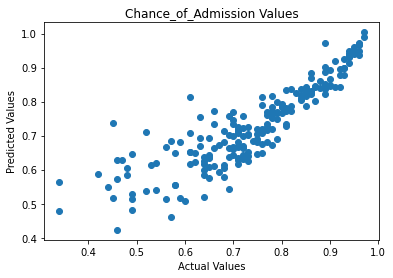

In [21]:
# compare actual vs predicted values of Chance_of_Admission
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Chance_of_Admission Values')

In [26]:
# determine the coefficients and intercept for the linear regression function in the form of 
# y = coef[0]xGRE_Score + coef[1]xTOEFL_Score + coef[2]xUniversity_Ranking + coef[3]xCGPA + intercept
coef = regression.coef_
intercept = regression.intercept_
print("Coefficients", coef)
print("Intercept", intercept)

Coefficients [0.00229479 0.00264949 0.0143048  0.12878749]
Intercept -1.4421126694286075


In [ ]:
# the actual linear regression function
# y = 0.00229479xGRE_Score + 0.00264949xTOEFL_Score + 0.0143048xUniversity_Ranking + 0.12878749xCGPA -1.4421126694286075